In [ ]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta

# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft

# expts = ["full-10","beamless-10","smooth-10","beamless-20","smooth-20","full-20","full-40","beamless-40","smooth-40"]
client = Client(threads_per_worker=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 26
Total threads: 104,Total memory: 416.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40625,Workers: 26
Dashboard: /proxy/8787/status,Total threads: 104
Started: Just now,Total memory: 416.00 GiB
Comm: tcp://127.0.0.1:41067,Total threads: 4
Dashboard: /proxy/36809/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:43213,


2025-02-24 17:20:14,209 - distributed.scheduler - WARNING - Detected different `run_spec` for key ('getitem-c588fcafe56f1c44e7009e65f5f752d1', 0, 0, 8.9, 0) between two consecutive calls to `update_graph`. This can cause failures and deadlocks down the line. Please ensure unique key names. If you are using a standard dask collections, consider releasing all the data before resubmitting another computation. More details and help can be found at https://github.com/dask/dask/issues/9888. 
Debugging information
---------------------
old task state: released
old run_spec: (<built-in function getitem>, (('_trim-49fc1b0ba9bebf2a6ecabce9444c0768', 0, 0, 9, 0), (slice(None, None, None), slice(None, None, None), slice(0, 1, None), slice(None, None, None))), {})
new run_spec: (<function execute_task at 0x14562f8565f0>, (('trim-getitem-c588fcafe56f1c44e7009e65f5f752d1', 0, 0, 8.9, 0),), {})
old token: ('tuple', [('33ce79d238760a25', []), ('tuple', [('tuple', ['_trim-49fc1b0ba9bebf2a6ecabce9444c076

$ \huge A_h (\nabla^2 u)^2 $

## Plot raw dissipation over long time average

In [2]:

def ShelfMask(data):
    return data.fillna(0).where(
        (data.bathy < 3000) & (data.xb < 200) & (data.bathy > 500),np.nan
    )
def calculate_dissipation(expt,t0):
    with tt.collect_data(
        expt,
        rawdata = ["ahh","u","v"],
        timerange = (t0,t0 + 233 * 50)
        ).sel(xb = slice(50,250),yb = slice(-80,80),zl = slice(0,4000)) as data:
        
        return xr.merge(
            [
            1e-6 * (data.ahh * (data.u.differentiate("xb").differentiate("xb") + data.v.differentiate("yb").differentiate("yb"))**2).mean("time").fillna(0).rename("dissipation").load(),
            data.bathy
            ]
        )

data = {}
data_vel = {}

for expt in ["beamless","full","smooth"]:
    print(expt)
    data[expt] = xr.merge(
        [
            xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-{expt}-20/output00*/KE_visc.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]),
            xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-{expt}-20/output00*/KE_horvisc.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]),
            xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-{expt}-20/output00*/Kd_interface.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]),
            xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc").depth.rename("bathy").drop_vars(["lat","lon"])
        ])
    data_vel[expt] = xr.merge([
            xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-{expt}-20/output00*/u/*.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]),
            xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-{expt}-20/output00*/v/*.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]),
            # xr.open_mfdataset(f"/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-{expt}-20/output00*/ahh/*.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"])
    ]
    )



beamless


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 1.06 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


full


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 1.06 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


smooth


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 271.63 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 1.06 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 543.26 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


-0.00033446668273414364


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 1.06 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


-0.0009974071576741995


/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 543.26 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


(50.0, 250.0)

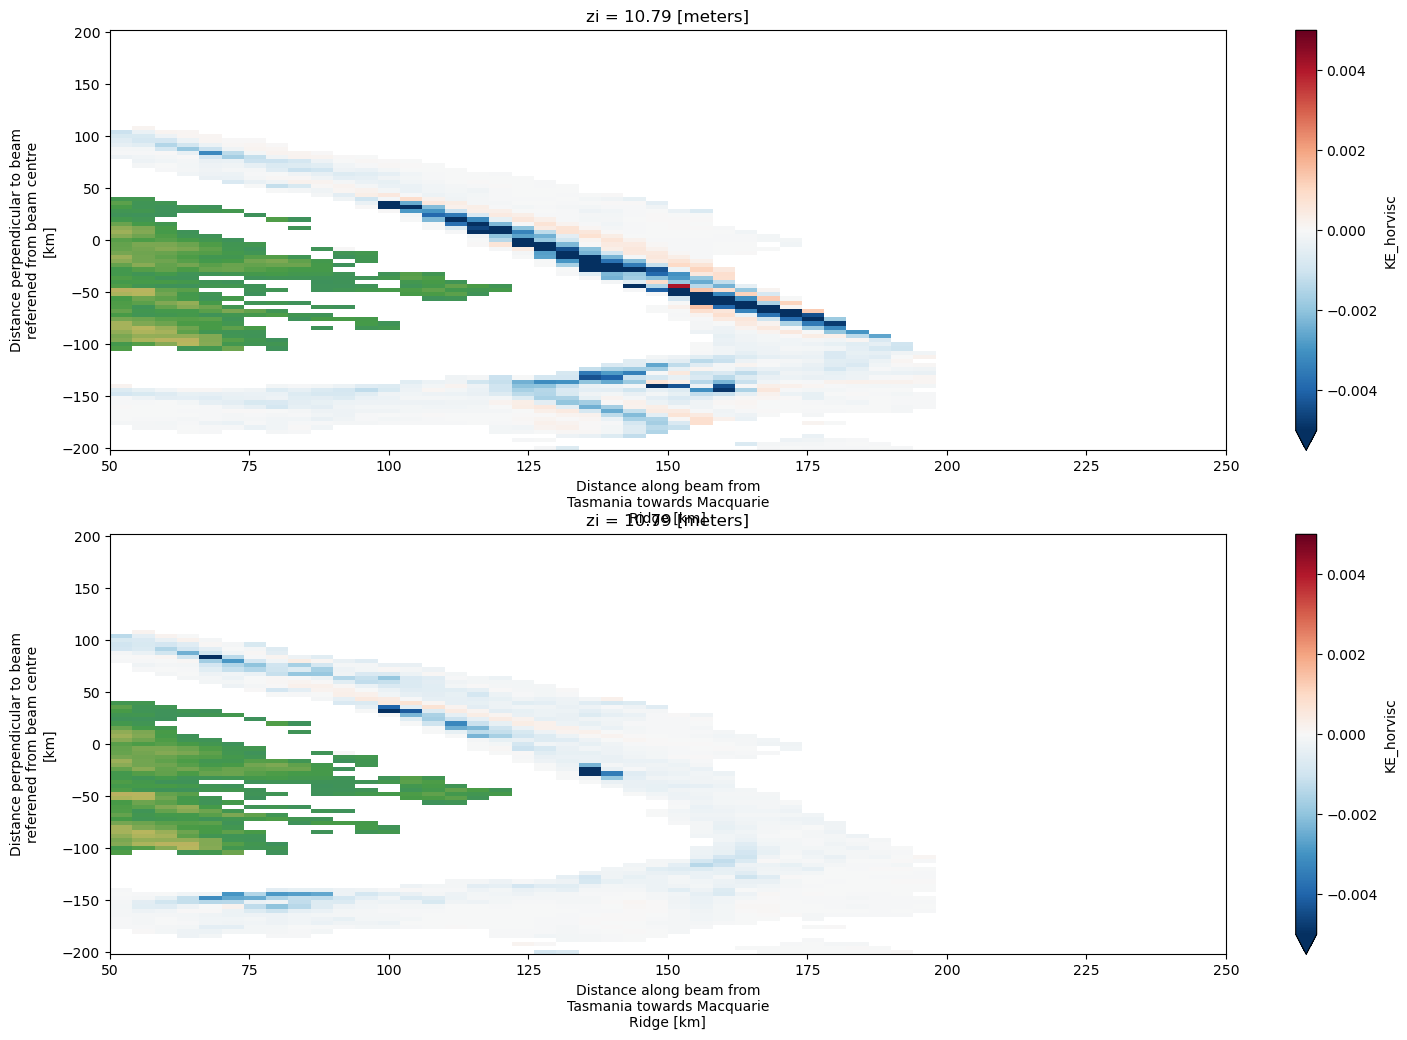

In [7]:
fig,ax = plt.subplots(2,1,figsize = (18,12))

def ShelfMask(data):
    return data.fillna(0).where(
        (data.bathy < 3000) & (data.xb < 200) & (data.bathy > 500),np.nan
    )

ShelfMask(data["beamless"]).KE_horvisc.sel(xb = slice(50,250)).isel(time = -1).integrate("zl").plot(ax = ax[0],cmap = "RdBu_r",vmax = 0.005,vmin = -0.005)
print(ShelfMask(data["full"]).KE_horvisc.sel(xb = slice(50,250)).isel(time = -1).integrate("zl").mean("xb").mean("yb").values)
print(ShelfMask(data["beamless"]).KE_horvisc.sel(xb = slice(50,250)).isel(time = -1).integrate("zl").mean("xb").mean("yb").values)
ShelfMask(data["full"]).KE_horvisc.sel(xb = slice(50,250)).isel(time = -1).integrate("zl").plot(ax = ax[1],cmap = "RdBu_r",vmax = 0.005,vmin = -0.005)
# print(ShelfMask(data["smooth"]).KE_horvisc.sel(xb = slice(50,250)).isel(time = -1).integrate("zl").mean("xb").mean("yb").values)
# ShelfMask(data["smooth"]).KE_horvisc.sel(xb = slice(50,250)).isel(time = -1).integrate("zl").plot(ax = ax[2],cmap = "RdBu_r",vmax = 0.005,vmin = -0.005)
tt.plot_topo(ax[0],-1 * data["beamless"]["bathy"])
tt.plot_topo(ax[1],-1 * data["beamless"]["bathy"])
ax[0].set_xlim(50,250)
ax[1].set_xlim(50,250)

## Timeseries

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 1.06 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 1.06 GiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/distributed/client.py:3357: UserWarning: Sending large graph of size 271.63 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


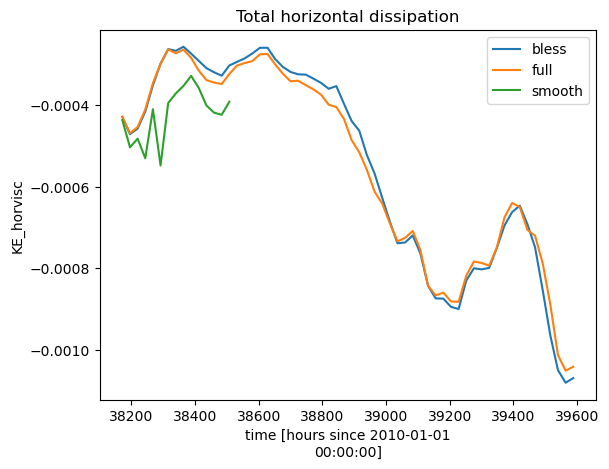

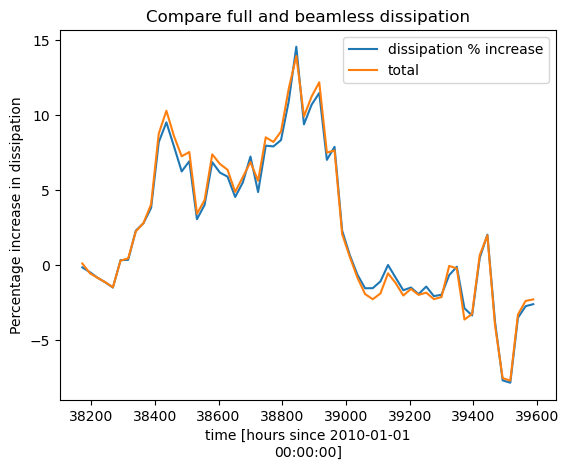

In [12]:
bless_hor = (ShelfMask(data["beamless"]).KE_horvisc).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
full_hor = (ShelfMask(data["full"]).KE_horvisc).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
bless_ver = (ShelfMask(data["beamless"]).KE_visc).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
full_ver = (ShelfMask(data["full"]).KE_visc).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
smooth_ver = (ShelfMask(data["smooth"]).KE_visc).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
smooth_hor = (ShelfMask(data["smooth"]).KE_horvisc).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()


bless_hor.plot(label = "bless")
full_hor.plot(label = "full")
smooth_hor.plot(label = "smooth")
plt.title("Total horizontal dissipation")
plt.legend()
plt.figure()

# (bless_ver).plot()
# (full_ver).plot()
# (smooth_ver).plot()
# plt.figure()

(100 * (full_hor - bless_hor) / bless_hor).plot(label = "dissipation % increase")
# (100 * (smooth_hor - bless_hor) / bless_hor).plot(label = "smooth horizontal only")


(100 * (full_ver + full_hor - bless_ver- bless_hor) / (bless_hor + bless_ver)).plot(label = "total")

plt.ylabel("Percentage increase in dissipation")
plt.title("Compare full and beamless dissipation")
plt.legend()

In [4]:
data_vel["full"] = xr.merge([data_vel["full"],data["full"].bathy])
data_vel["smooth"] = xr.merge([data_vel["smooth"],data["smooth"].bathy])
data_vel["beamless"] = xr.merge([data_vel["beamless"],data["beamless"].bathy])

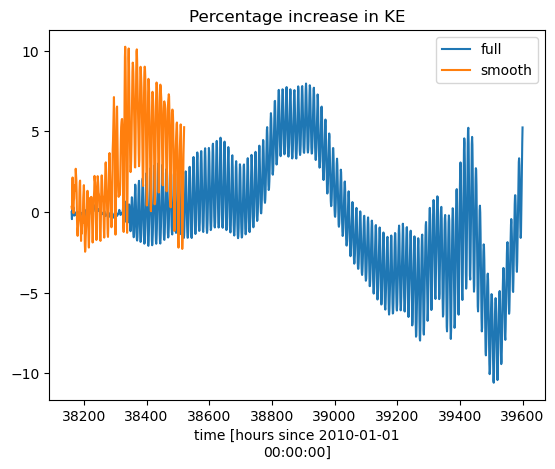

In [5]:
def ShelfMask(data):
    return data.fillna(0).where(
        (data.bathy < 3000) & (data.xb < 200) & (data.bathy > 500),np.nan
    )

bless_ke = (ShelfMask(data_vel["beamless"]).u**2 + ShelfMask(data_vel["beamless"]).v**2).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
full_ke = (ShelfMask(data_vel["full"]).u**2 + ShelfMask(data_vel["full"]).v**2).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()
smooth_ke = (ShelfMask(data_vel["smooth"]).u**2 + ShelfMask(data_vel["smooth"]).v**2).sel(xb = slice(50,250)).integrate("zl").sel(yb = slice(-80,None)).mean("yb").mean("xb").load()

(100 * (full_ke - bless_ke) / bless_ke).plot(label = "full")
(100 * (smooth_ke - bless_ke) / bless_ke).plot(label = "smooth")
plt.title("Percentage increase in KE")
plt.legend()

## Compare manually computed dissipation to model output

Need to be careful we match the free slip BC! This means we should fill in all values next to topography with duplicates of the velocity next to boundary. Maybe need to do this by layer? First though: Check again what happens comparing our dissipation to model diagnosed in the open ocean!

In [2]:
ahh = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/ahh/*",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).ahh.astype(np.float32)
u = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/u/*",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).u.astype(np.float32)
v = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/v/*",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).v.astype(np.float32)
kevisc = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/KE_horvisc.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).KE_horvisc

In [3]:
dissipation = 1e-12 * ahh * (u.differentiate("xb").differentiate("xb") + v.differentiate("yb").differentiate("yb"))**2
dissipation2 = 1e-12 * ahh * (u.differentiate("xb",edge_order=2).differentiate("xb",edge_order=1).differentiate("xb",edge_order=2).differentiate("xb",edge_order=1) + v.differentiate("yb",edge_order=1).differentiate("yb",edge_order=2).differentiate("yb",edge_order=2).differentiate("yb",edge_order=1)) * np.sqrt(u**2 + v**2)


Text(0.5, 1.0, 'Vertical profile of dissipation')

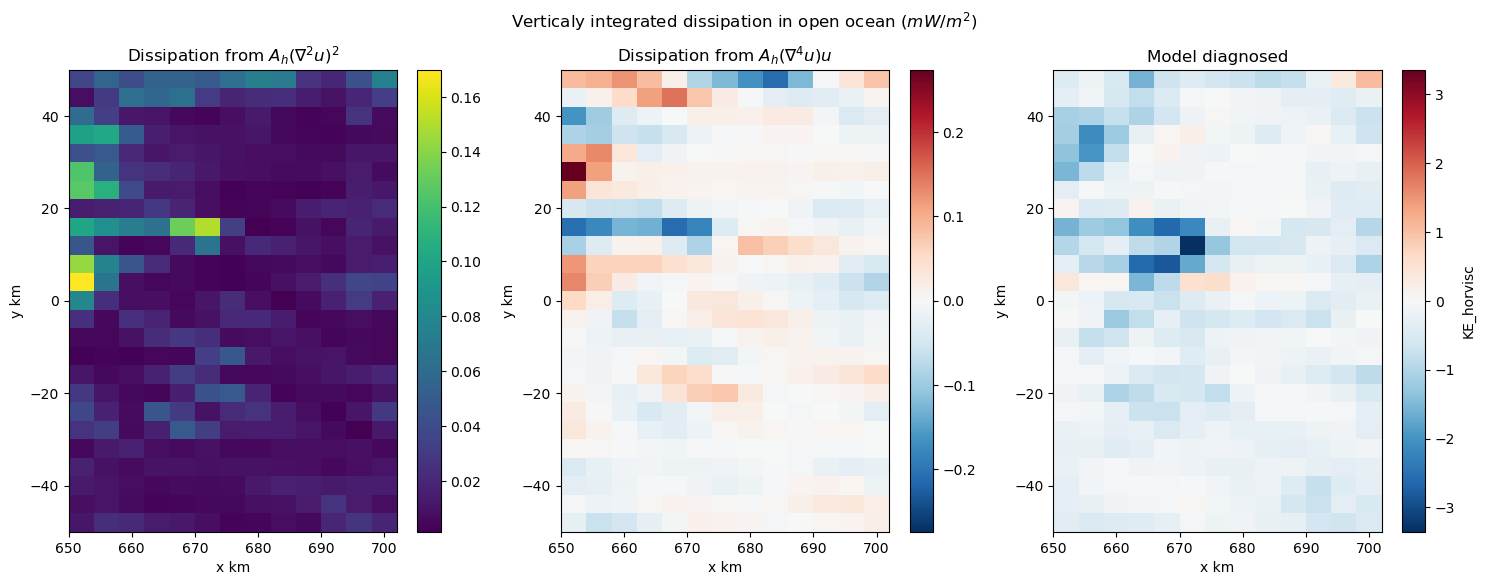

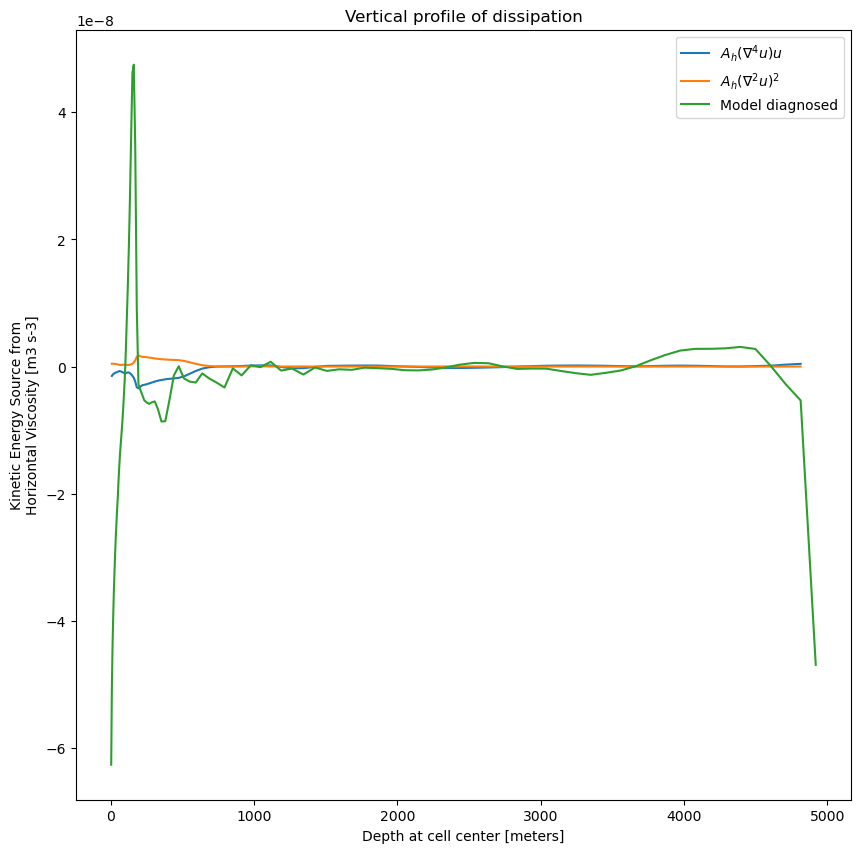

In [10]:
# two plots sie by side
fig,ax = plt.subplots(1,3,figsize = (18,6))
d2_subset = dissipation2.sel(xb = slice(650,700),yb = slice(-50,50)).isel(time = -1).fillna(0).integrate("zl").load() * 1e6
d_subset = dissipation.sel(xb = slice(650,700),yb = slice(-50,50)).isel(time = -1).fillna(0).integrate("zl").load() * 1e6

d_subset.plot(ax = ax[0])
d2_subset.plot(ax = ax[1])
(kevisc * 1e6).sel(xb = slice(650,700),yb = slice(-50,50)).isel(time = -1).fillna(0).sum("zl").plot(ax = ax[2])

fig.suptitle(r"Verticaly integrated dissipation in open ocean $(mW/m^2)$")
ax[0].set_title(r"Dissipation from $A_h (\nabla^2 u)^2$")
ax[1].set_title(r"Dissipation from $A_h (\nabla^4 u)u$")
ax[2].set_title(r"Model diagnosed")

for i in range(3):
    ax[i].set_xlabel("x km")
    ax[i].set_ylabel("y km")

fig,ax = plt.subplots(1,1,figsize = (10,10))

d2_vprofile = dissipation2.sel(xb = 590,yb = 0,method = "nearest").isel(time = -1).isel(zl = slice(0,99)) * kevisc.zl.diff("zl").load()
d_vprofile = dissipation.sel(xb = 590,yb = 0,method = "nearest").isel(time = -1).isel(zl = slice(0,99)) * kevisc.zl.diff("zl").load()

d2_vprofile.plot(ax = ax,label = r"$A_h (\nabla^4 u)u$")
d_vprofile.plot(ax = ax,label = r"$A_h (\nabla^2 u)^2$")
kevisc.sel(xb = 590,yb = 0,method = "nearest").isel(time = -1).plot(ax = ax,label = "Model diagnosed")
ax.legend()
ax.set_title("Vertical profile of dissipation")


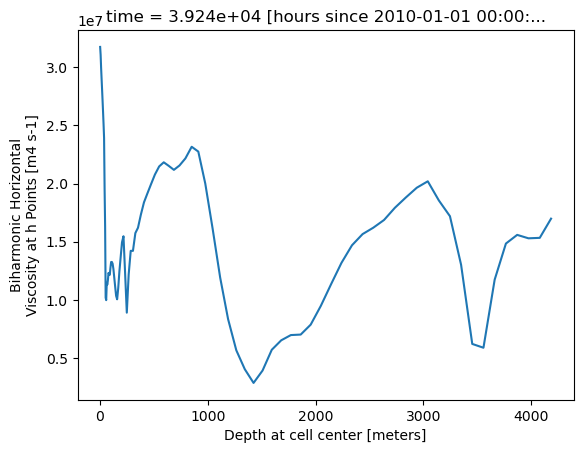

In [16]:
ahh.sel(xb = 400,yb = 0,method = "nearest").isel(time = -1).plot()

Text(0.5, 1.0, 'Vertical profile of dissipation')

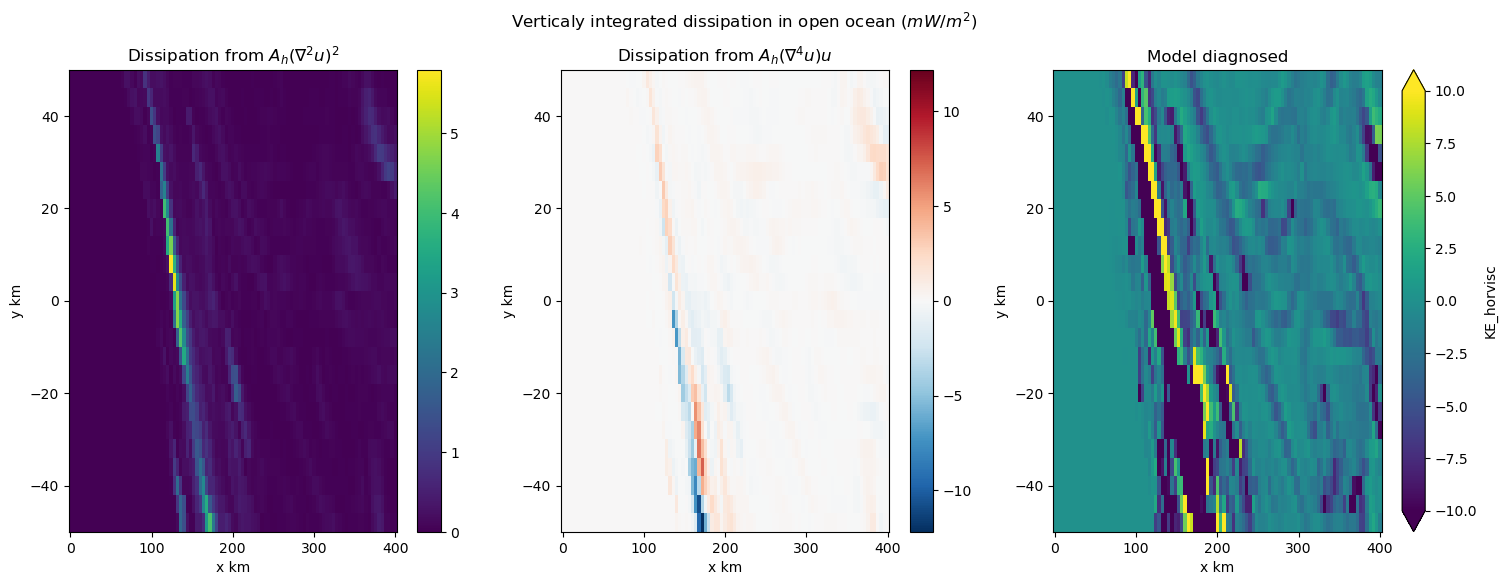

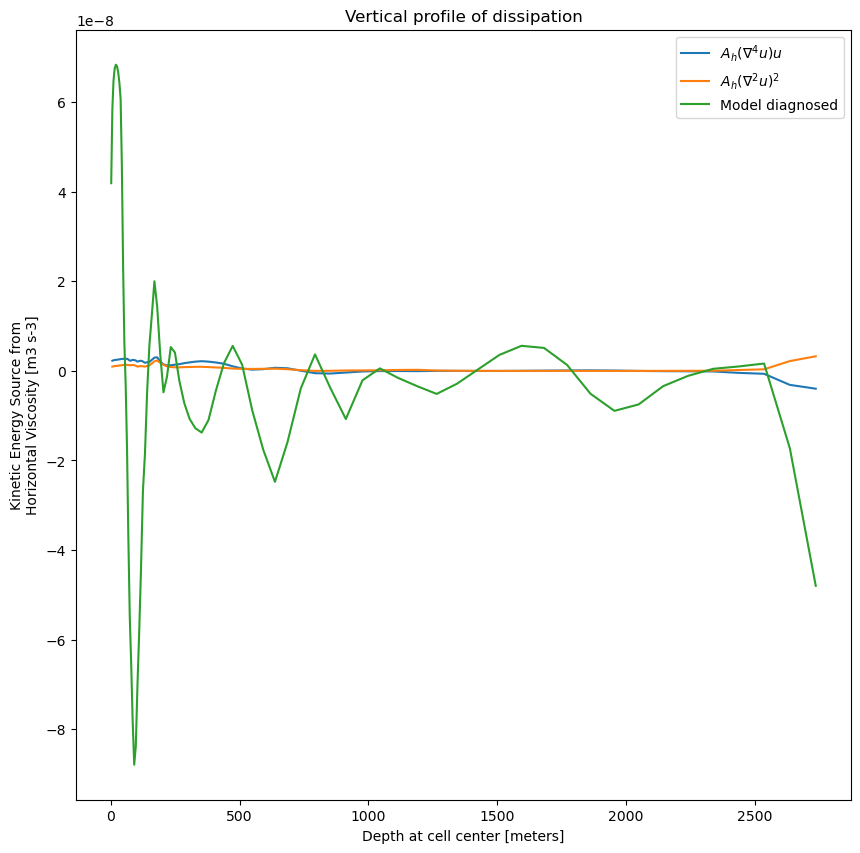

In [9]:
# two plots sie by side
fig,ax = plt.subplots(1,3,figsize = (18,6))
# d2_subset = dissipation2.sel(xb = slice(0,400),yb = slice(-50,50)).isel(time = -1).fillna(0).integrate("zl").load() * 1e6
# d_subset = dissipation.sel(xb = slice(0,400),yb = slice(-50,50)).isel(time = -1).fillna(0).integrate("zl").load() * 1e6

d_subset.plot(ax = ax[0])
d2_subset.plot(ax = ax[1])
(kevisc * 1e6).sel(xb = slice(0,400),yb = slice(-50,50)).isel(time = -1).fillna(0).sum("zl").plot(ax = ax[2],vmax = 10,vmin = -10)

fig.suptitle(r"Verticaly integrated dissipation in open ocean $(mW/m^2)$")
ax[0].set_title(r"Dissipation from $A_h (\nabla^2 u)^2$")
ax[1].set_title(r"Dissipation from $A_h (\nabla^4 u)u$")
ax[2].set_title(r"Model diagnosed")

for i in range(3):
    ax[i].set_xlabel("x km")
    ax[i].set_ylabel("y km")

fig,ax = plt.subplots(1,1,figsize = (10,10))

d2_vprofile = dissipation2.sel(xb = 300,yb = 0,method = "nearest").isel(time = -1).isel(zl = slice(0,99)) * kevisc.zl.diff("zl").load()
d_vprofile = dissipation.sel(xb = 300,yb = 0,method = "nearest").isel(time = -1).isel(zl = slice(0,99)) * kevisc.zl.diff("zl").load()

d2_vprofile.plot(ax = ax,label = r"$A_h (\nabla^4 u)u$")
d_vprofile.plot(ax = ax,label = r"$A_h (\nabla^2 u)^2$")
kevisc.sel(xb = 300,yb = 0,method = "nearest").isel(time = -1).plot(ax = ax,label = "Model diagnosed")
ax.legend()
ax.set_title("Vertical profile of dissipation")


$ \huge 

In [2]:
def calculate_dissipation(expt,t0):
    with tt.collect_data(
        expt,
        rawdata = ["ahh","u","v"],
        timerange = (t0,t0 + 233 * 50)
        ).sel(xb = slice(50,250),yb = slice(-80,80),zl = slice(0,4000)) as data:
        
        
        return xr.merge(
            [
            1e-6 * (data.ahh * (data.u.differentiate("xb").differentiate("xb") + data.v.differentiate("yb").differentiate("yb"))**2).mean("time").fillna(0).rename("dissipation").load(),
            data.bathy
            ]
        )
def calculate_dissipation(expt,t0,xb = slice(50,250),yb = slice(-80,80),zl = slice(0,4000)):
    with tt.collect_data(
        expt,
        rawdata = ["ahh","u","v"],
        timerange = (t0,t0 + 233 * 50)
        ).sel(xb = xb,yb = yb,zl = zl).fillna(0) as data:
        
        return xr.merge(
            [
            (1e-12 * data.ahh * ( ## 1e-12 is conversion from 1/km^2 to 1/m2. (1e-3)^4
                data.u.differentiate("xb",edge_order = 2).differentiate("xb",edge_order = 2) + 
                data.v.differentiate("yb",edge_order=2).differentiate("yb",edge_order=2)
                )**2).mean("time").rename("dissipation").load(),
            data.bathy
            ]
        )

ahh = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/ahh/*",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).ahh.astype(np.float32)
u = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/u/*",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).u.fillna(0).astype(np.float32)
v = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/v/*",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).v.fillna(0).astype(np.float32)
kevisc = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/KE_visc.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"])

bathy = bathy = xr.open_dataset("/g/data/nm03/ab8992/outputs/full-20/bathy_transect.nc").depth.sel(xb = slice(0,400),yb = slice(-80,None))


dissipation = (ahh * (1e-6 * u.differentiate("xb",edge_order=2).differentiate("xb",edge_order=2) + 1e-6 * v.differentiate("yb",edge_order=2).differentiate("yb",edge_order=2))**2).sel(xb = slice(0,400),yb = slice(-80,None)).load()
kevisc = xr.open_mfdataset("/g/data/nm03/ab8992/outputs/DissipationExperiment/DE-full-20/output002/KE_horvisc.nc",decode_times = False,decode_cf = False).drop_vars(["lat","lon"]).sel(xb = slice(0,400),yb = slice(-80,None))

dissipation = xr.merge([
    dissipation.rename("dissipation"),bathy.rename("bathy")
])
kevisc = xr.merge([
    kevisc.KE_horvisc.rename("kevisc"),bathy.rename("bathy")
])

8.71586769148197e-08
2.0598486e-06


Text(0.5, 0, 'Distance from Tasmania (km)')

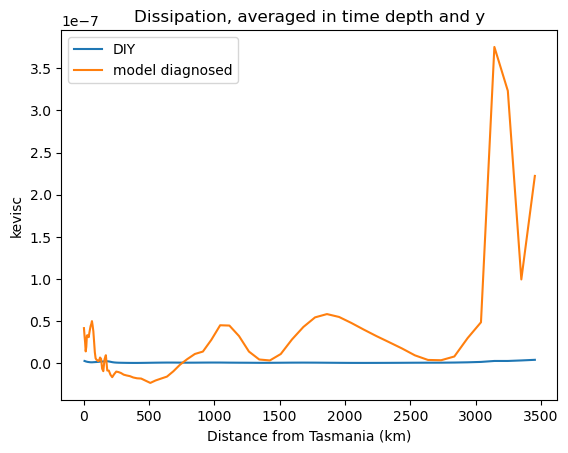

In [17]:
x = 250
z = 800

(dissipation.isel(zl = slice(0,99)) * dissipation.zl.diff("zl")).dissipation.sel(yb = 20,xb = x,method = "nearest").mean("time").plot(label = "DIY")
(-1 * kevisc).kevisc.sel(yb = 20,xb = x,method = "nearest").mean("time").plot(label = "model diagnosed")

print((dissipation.isel(zl = slice(0,99)) * dissipation.zl.diff("zl")).dissipation.sel(yb = 20,xb = x,method = "nearest").mean("time").sum("zl").values)
print((-1 * kevisc).kevisc.sel(yb = 20,xb = x,method = "nearest").mean("time").sum("zl").values)


plt.legend()
plt.title("Dissipation, averaged in time depth and y")
plt.xlabel("Distance from Tasmania (km)")

-1.4030626e-06


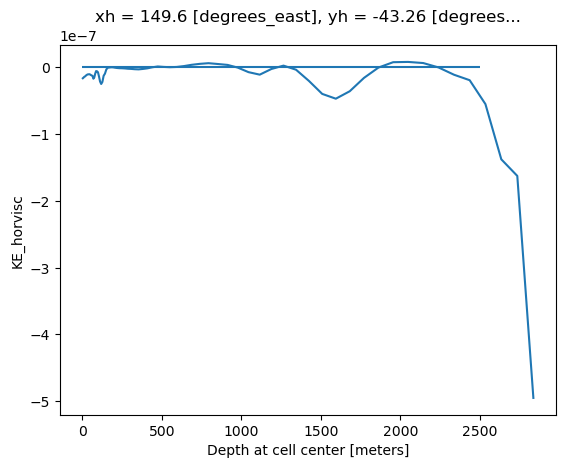

In [16]:
KE_horvisc_raw = xr.open_dataset("/scratch/nm03/ab8992/mom6/archive/DE-full-20/output002/20140609.KE_horvisc.nc").KE_horvisc

KE_horvisc_raw.sel(xh = 149.613,yh = -43.2534,method = "nearest").mean("time").plot(label = "model diagnosed")
plt.hlines(0,0,2500)
print((KE_horvisc_raw).sel(xh = 149.613,yh = -43.2534,method = "nearest").mean("time").sum("z_l").values)


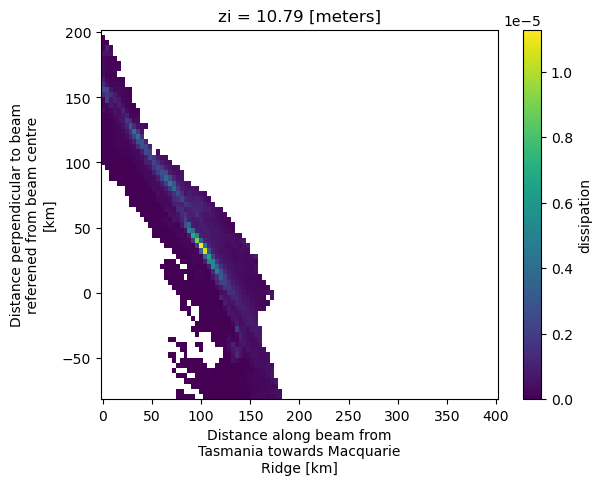

In [44]:
ShelfMask(dissipation).dissipation.integrate("zl").mean("time").plot()

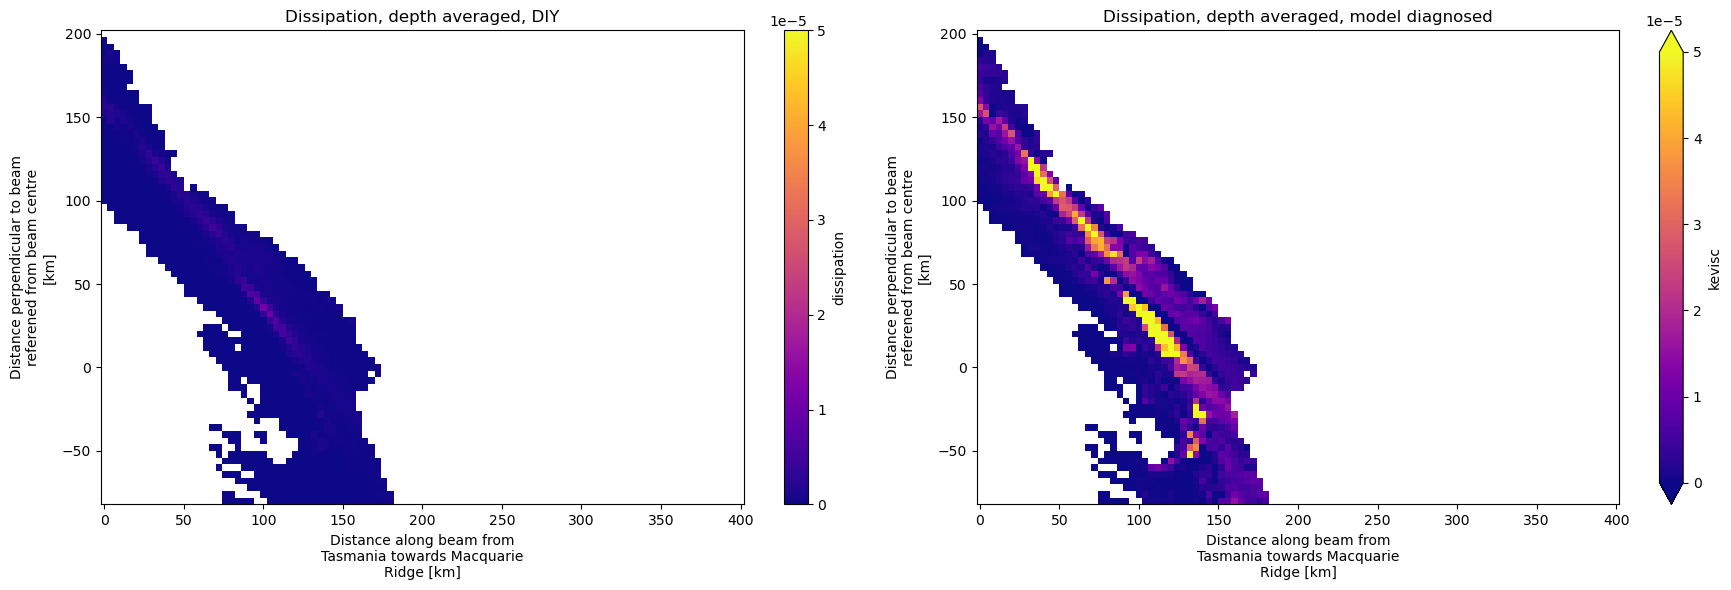

In [47]:
x = 300
z = 800
def ShelfMask(data):
    return data.fillna(0).where(
        (data.bathy < 3000) & (data.xb < 200) & (data.bathy > 0),np.nan
    )

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
vmax = 0.00005
im0 = ShelfMask(dissipation).dissipation.integrate("zl").mean("time").where(bathy > 0).plot(
    ax=axes[0], label="DIY",vmax = vmax, cmap="plasma", add_colorbar=True
)
axes[0].set_title("Dissipation, depth averaged, DIY")

im1 = (-1 * ShelfMask(kevisc.sum("zl")).kevisc).mean("time").where(bathy > 0).plot(
    ax=axes[1], vmin = 0,vmax = vmax, label="model diagnosed", cmap="plasma", add_colorbar=True
)
axes[1].set_title("Dissipation, depth averaged, model diagnosed")

# fig.colorbar(im0, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.tight_layout()

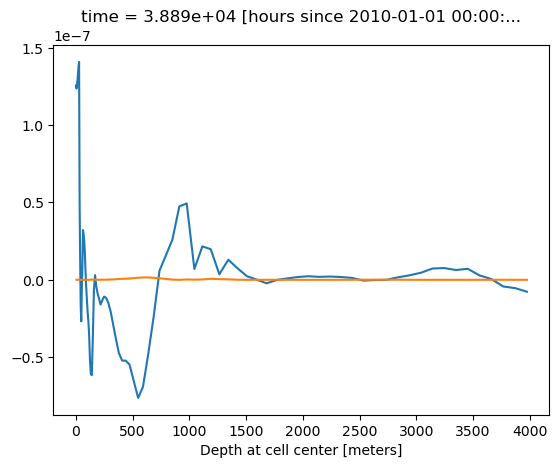

In [60]:
(-1*kevisc).kevisc.isel(xb = 50,yb = 30).isel(time = 5).plot()
(dissipation.dissipation.isel(zl = slice(0,99)) *dissipation.zl.diff("zl")).isel(xb = 50,yb = 30).isel(time = 5).plot()

In [52]:
(dissipation.dissipation * dissipation.zl)

<xarray.DataArray (time: 360, zl: 100, yb: 71, xb: 101)> Size: 2GB
array([[[[           nan,            nan,            nan, ...,
          7.42130563e-12, 7.75330108e-11, 5.61653019e-10],
         [           nan,            nan,            nan, ...,
          1.16421326e-09, 8.68613095e-10, 8.15246744e-10],
         [           nan,            nan,            nan, ...,
          8.59607284e-11, 1.85230059e-10, 4.87490534e-10],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.41345269e-12, 1.64172891e-11, 4.13444946e-12],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.33665589e-10, 4.04177704e-11, 3.29848159e-10],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.58421222e-09, 1.18052756e-09, 6.62671092e-11]],

        [[           nan,            nan,            nan, ...,
          1.29561219e-11, 2.34715773e-10, 1.59180115e-09],
         [           nan,            nan,            nan, ...,
          2.97594176e-09, 2.30303140e-09, 2.06347000e-09],
         [           nan,            nan,            nan, ...,
          2.51925204e-10, 5.29884424e-10, 1.34522068e-09],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                     nan,            nan,            nan],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                     nan,            nan,            nan],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                     nan,            nan,            nan]],

        [[           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         [           nan,            nan,            nan, ...,
                     nan,            nan,            nan],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                     nan,            nan,            nan],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                     nan,            nan,            nan],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                     nan,            nan,            nan]]]])
Coordinates:
  * zl       (zl) float64 800B 2.21 6.643 11.1 ... 5.236e+03 5.342e+03 5.447e+03
  * time     (time) float64 3kB 3.888e+04 3.888e+04 ... 3.924e+04 3.924e+04
  * xb       (xb) float64 808B -0.0 4.0 8.0 12.0 ... 388.0 392.0 396.0 400.0
  * yb       (yb) float64 568B -80.0 -76.0 -72.0 -68.0 ... 192.0 196.0 200.0
    zi       float64 8B 10.79
    lon      (yb, xb) float64 57kB ...
    lat      (yb, xb) float64 57kB ...

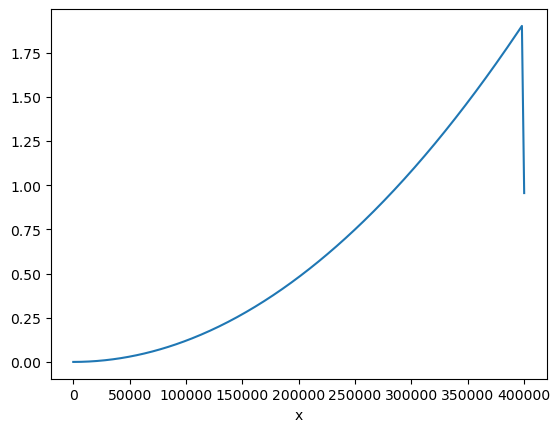

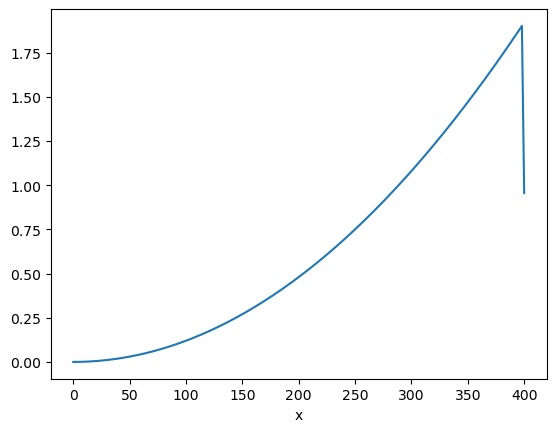

In [73]:
x = np.linspace(0,400,400)
y = x**4

data = xr.DataArray(
    data = y,
    dims = ["x"],
    coords = {"x":x}
)
data2 = xr.DataArray(
    data = y,
    dims = ["x"],
    coords = {"x":x*1000}
)

data2.differentiate("x").differentiate("x").plot()
plt.figure()
(1e-6 * data).differentiate("x").differentiate("x").plot()
